In [6]:
import numpy as np
import matplotlib.pyplot as plt
import inspect

In [7]:
import importlib
import sys
sys.path.append('../')
from Utils.perturbationsnew import RBPIndividual, RBPIndividualNew1, RBPIndividualNew2, zeroPerturb, noisePerturb, blurPerturb
from Utils.models import *
from Utils.data import perturb, generateSynthetic, generateSyntheticPerturbReal,ReadTS

print(sys.path)


['/Users/gali/anaconda3/envs/LIMEtf/lib/python310.zip', '/Users/gali/anaconda3/envs/LIMEtf/lib/python3.10', '/Users/gali/anaconda3/envs/LIMEtf/lib/python3.10/lib-dynload', '', '/Users/gali/anaconda3/envs/LIMEtf/lib/python3.10/site-packages', '/Users/gali/anaconda3/envs/LIMEtf/lib/python3.10/site-packages/setuptools/_vendor', '../', '../', '../']


## Test important content removal (accuracy decrease)

### Load synthetic dataset and train CNN model 

In [8]:
x_train, y_train,x_test_original, y_test_original = ReadTS('Computers')
y_train = y_train - 1
y_test_original = y_test_original - 1
print(x_train.shape)
print(y_train)

(250, 720, 1)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [23]:
from sklearn.preprocessing import StandardScaler
def normalize(TS):
    # 获取原始数据集的形状
    original_shape = TS.shape
    
    # 将数据集reshape成二维数组
    TS_2d = TS.reshape(original_shape[0] , original_shape[1])
    
    # 初始化StandardScaler
    scaler = StandardScaler()
    
    # 对数据集进行标准化
    TS_normalized = scaler.fit_transform(TS_2d)
    
    # 将标准化后的数据集reshape回原始形状
    TS = TS_normalized.reshape(original_shape)
    
    return TS

x_train = normalize(x_train)
x_test_original = normalize(x_test_original)
print(x_train)

[[[-0.1741747 ]
  [-0.21342408]
  [-0.19601436]
  ...
  [-0.15035935]
  [-0.14782277]
  [-0.21294272]]

 [[-0.39021695]
  [-0.43060625]
  [-0.41531764]
  ...
  [-0.45031786]
  [-0.44432775]
  [-0.49209104]]

 [[-0.16221307]
  [-0.20139933]
  [-0.18387217]
  ...
  [-0.13375152]
  [-0.13140615]
  [-0.19748709]]

 ...

 [[-0.019796  ]
  [-0.32610914]
  [-0.03930541]
  ...
  [-0.30599295]
  [ 0.06405269]
  [-0.35777895]]

 [[-0.23511313]
  [-0.46127823]
  [-0.25787262]
  ...
  [-0.49268009]
  [-0.2314571 ]
  [-0.53151431]]

 [[ 5.73861406]
  [ 5.73056295]
  [ 5.80602434]
  ...
  [-0.22653958]
  [-0.22312591]
  [-0.2838378 ]]]


In [10]:
model = make_CNN_model(x_train.shape[1:],num_classes = 2)
trained_model, history = train_CNN_model(model, x_train, y_train, epochs=300, batch_size=32)

Epoch 1/300


2024-11-17 21:30:52.387593: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


7/7 [==============================] - 1s 40ms/step - loss: 0.6477 - sparse_categorical_accuracy: 0.5950 - val_loss: 0.7450 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/300
7/7 [==============================] - 0s 25ms/step - loss: 0.5619 - sparse_categorical_accuracy: 0.6600 - val_loss: 0.7659 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 3/300
7/7 [==============================] - 0s 27ms/step - loss: 0.5437 - sparse_categorical_accuracy: 0.7400 - val_loss: 0.7345 - val_sparse_categorical_accuracy: 0.0800
Epoch 4/300
7/7 [==============================] - 0s 28ms/step - loss: 0.5355 - sparse_categorical_accuracy: 0.6850 - val_loss: 0.6984 - val_sparse_categorical_accuracy: 0.6400
Epoch 5/300
7/7 [==============================] - 0s 27ms/step - loss: 0.5419 - sparse_categorical_accuracy: 0.6800 - val_loss: 0.6662 - val_sparse_categorical_accuracy: 0.8000
Epoch 6/300
7/7 [==============================] - 0s 28ms/step - loss: 0.5280 - sparse_categorical_accuracy: 0.75

In [11]:
test_loss, test_acc = trained_model.evaluate(x_test_original, y_test_original)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

8/8 [==============================] - 0s 6ms/step - loss: 1.7708 - sparse_categorical_accuracy: 0.7040
Test accuracy 0.7039999961853027
Test loss 1.7707841396331787


### Create perturbed test sets and calculate decrease in accuracy

In [12]:
print(y_test_original.shape)

(250,)


In [13]:
print(inspect.getsource(perturb))
print(inspect.signature(perturb))

def perturb(perturbation_strategy, ts, index0, index1, global_ts = []):
    if perturbation_strategy == 'RBP':
        return RBPIndividual(ts, index0, index1)
    if perturbation_strategy == 'zero':
        return zeroPerturb(ts, index0, index1)
    if perturbation_strategy == 'noise':
        return noisePerturb(ts, index0, index1)
    if perturbation_strategy == 'blur':
        return blurPerturb(ts, index0, index1)
    if perturbation_strategy == 'RBP1':
        return RBPIndividualNew1(global_ts, ts, index0, index1)    
    if perturbation_strategy == 'RBP2':
        return RBPIndividualNew2(global_ts, ts, index0, index1)    

(perturbation_strategy, ts, index0, index1, global_ts=[])


In [14]:
predictions_original = model.predict(x_test_original)
perturb_test_set = x_test_original.copy()
perturb_test_set = perturb_test_set.reshape(x_test_original.shape[0:2])

x_test_rbp = np.asarray([perturb('RBP',x,400,500) for x in perturb_test_set])
x_test_rbp = np.expand_dims(x_test_rbp, axis=-1)
predictions_rbp = model.predict(x_test_rbp)

pert1 = perturb('RBP1',perturb_test_set[0],400,500, global_ts = perturb_test_set)
x_test_new1 = np.asarray([perturb('RBP1',x,60,160, global_ts = perturb_test_set) for x in perturb_test_set])
x_test_new1 = np.expand_dims(x_test_new1, axis=-1)
predictions_new1 = model.predict(x_test_new1)

#x_test_new2 = np.asarray([perturb('RBP2',x,400,500, global_ts = perturb_test_set) for x in perturb_test_set])
#x_test_new2 = np.expand_dims(x_test_new2, axis=-1)
#predictions_new2 = model.predict(x_test_new2)

x_test_zero = np.asarray([perturb('zero',x,400,500) for x in perturb_test_set])
x_test_zero = np.expand_dims(x_test_zero, axis=-1)
predictions_zero = model.predict(x_test_zero)

x_test_noise = np.asarray([perturb('noise',x,400,500) for x in perturb_test_set])
x_test_noise = np.expand_dims(x_test_noise, axis=-1)
predictions_noise = model.predict(x_test_noise)

x_test_blur = np.asarray([perturb('blur',x,400,500) for x in perturb_test_set])
x_test_blur = np.expand_dims(x_test_blur, axis=-1)
predictions_blur = model.predict(x_test_blur)

8/8 [==============================] - 0s 5ms/step


In [24]:
def l2norm(perturb):
    # 计算两个数组之间的差
    difference = perturb - x_test_original
    
    # 计算差的平方
    squared_difference = np.square(difference)
    
    # 计算平方和，沿着特征维度（axis=1），因为每个时间序列样本是一行
    sum_of_squares = np.sum(squared_difference, axis=1)
    
    # 计算平方和的平方根，即l2范数
    l2_norms = np.sqrt(sum_of_squares)
    
    average_l2_norm = np.mean(l2_norms)
    
    # l2_norms现在是一个形状为(467,)的数组，其中每个元素代表
    # 对应时间序列样本之间的l2范数
    print(average_l2_norm)  # 输出: (467,)

l2norm(x_test_rbp)
l2norm(x_test_new1)
l2norm(x_test_zero)
l2norm(x_test_noise)
l2norm(x_test_blur)

13.022920306443392
12.060990604872815
14.298408918330086
27.441477642159093
10.90928927371158


In [16]:
def accuracy(predictions, labels):
    hits = 0
    for i in range(0,len(predictions)):
        if predictions[i] == labels[i]:
            hits += 1
    return hits/len(predictions)

In [17]:
original_accuracy = accuracy(np.argmax(predictions_original,axis=1), y_test_original)
rbp_accuracy = accuracy(np.argmax(predictions_rbp,axis=1), y_test_original)
new1_accuracy = accuracy(np.argmax(predictions_new1,axis=1), y_test_original)
#new2_accuracy = accuracy(np.argmax(predictions_new2,axis=1), y_test_original)
zero_accuracy = accuracy(np.argmax(predictions_zero,axis=1), y_test_original)
noise_accuracy = accuracy(np.argmax(predictions_noise,axis=1), y_test_original)
blur_accuracy = accuracy(np.argmax(predictions_blur,axis=1), y_test_original)

In [18]:
print(" Original Accuracy: " + str(original_accuracy) + "\n"+
    " RBP Accuracy: " + str(rbp_accuracy) + "\n"+
    " RBP1 Accuracy: " + str(new1_accuracy) + "\n"+
    #" RBP2 Accuracy: " + str(new2_accuracy) + "\n"+
      
    " Zero Accuracy: " + str(zero_accuracy) + "\n"+
    " Noise Accuracy: " + str(noise_accuracy) + "\n"+
    " Blur Accuracy: " + str(blur_accuracy) + "\n")

 Original Accuracy: 0.704
 RBP Accuracy: 0.716
 RBP1 Accuracy: 0.656
 Zero Accuracy: 0.688
 Noise Accuracy: 0.52
 Blur Accuracy: 0.696



#### The results above shows that the two improved perturbations can lower the accuracy of classification to the same level as the original perturbation approach, indicating that these backgrounds are equally uninformative.

## Test Realism of Generated Samples 

### Generate synthetic data 

In [19]:
perturbed_datasets = generateSyntheticPerturbReal(500)
def get_list_shape(lst):
    if isinstance(lst, list):
        return [len(lst)] + get_list_shape(lst[0]) if lst else []
    else:
        return []

# 示例列表
print(get_list_shape(perturbed_datasets))  # 输出: [2, 3]

/Users/gali/Desktop/LIMESegment/Experiments/Utils/perturbationsnew.py:65: RuntimeWarning: invalid value encountered in double_scalars
  measures.append(np.mean(freq_composition)/np.std(freq_composition))


[7, 2]


In [20]:
print(inspect.getsource(generateSyntheticPerturbReal))
print(inspect.signature(generateSyntheticPerturbReal))
print(inspect.getfile(generateSyntheticPerturbReal))

def generateSyntheticPerturbReal(train_size):

    A = ASyntheticPerturb(train_size)
    B = ASyntheticPerturb(train_size)
    rbp_B = [perturb('RBP',example, 400, 500) for example in B]
    rbp1_B = [perturb('RBP1',example, 400, 500, B) for example in B]
    rbp2_B = [perturb('RBP2',example, 400, 500, B) for example in B]
    zero_B = [perturb('zero',example, 400, 500) for example in B]
    noise_B = [perturb('noise',example, 400, 500) for example in B]
    blur_B = [perturb('blur',example, 400, 500) for example in B]

    x_train_original = np.concatenate((A,B),axis=0)
    x_train_rbp = np.concatenate((A,rbp_B),axis=0)
    x_train_rbp1 = np.concatenate((A,rbp1_B),axis=0)
    x_train_rbp2 = np.concatenate((A,rbp2_B),axis=0)
    x_train_zero = np.concatenate((A,zero_B),axis=0)
    x_train_noise = np.concatenate((A,noise_B),axis=0)
    x_train_blur = np.concatenate((A,blur_B),axis=0)
    y_train = np.asarray(list(np.ones(500)) + list(np.zeros(500)))

    x_train_original = x_train_origi

### Create CNN model and train on each perturbed dataset 

In [21]:
datasets_training_loss = []
for dataset in perturbed_datasets: 
    model = make_CNN_model(dataset[0].shape[1:])
    trained_model, history = train_CNN_model(model, dataset[0], dataset[1], epochs=100, batch_size=32)
    datasets_training_loss.append(history.history['val_loss'])

Epoch 1/100
25/25 [==============================] - 1s 25ms/step - loss: 0.7004 - sparse_categorical_accuracy: 0.5050 - val_loss: 0.7009 - val_sparse_categorical_accuracy: 0.4950
Epoch 2/100
25/25 [==============================] - 1s 22ms/step - loss: 0.6919 - sparse_categorical_accuracy: 0.5138 - val_loss: 0.7044 - val_sparse_categorical_accuracy: 0.4950
Epoch 3/100
25/25 [==============================] - 1s 23ms/step - loss: 0.6872 - sparse_categorical_accuracy: 0.5475 - val_loss: 0.7152 - val_sparse_categorical_accuracy: 0.4950
Epoch 4/100
25/25 [==============================] - 1s 23ms/step - loss: 0.6856 - sparse_categorical_accuracy: 0.5487 - val_loss: 0.7123 - val_sparse_categorical_accuracy: 0.4950
Epoch 5/100
25/25 [==============================] - 1s 24ms/step - loss: 0.6842 - sparse_categorical_accuracy: 0.5562 - val_loss: 0.6981 - val_sparse_categorical_accuracy: 0.4750
Epoch 6/100
25/25 [==============================] - 1s 23ms/step - loss: 0.6817 - sparse_categorica

### Visualise loss curves of model training on perturbed datasets

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


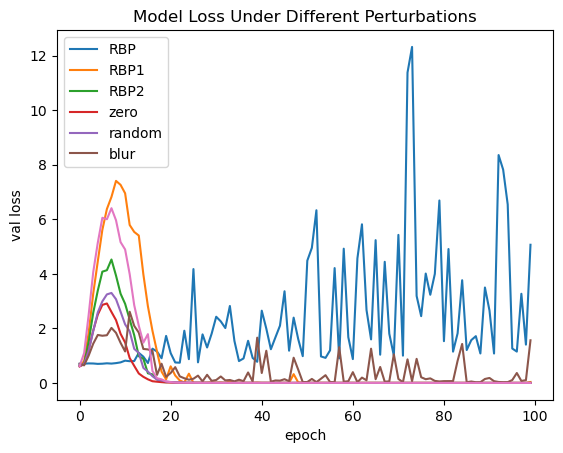

In [22]:

for loss in datasets_training_loss:
    plt.plot(loss)
plt.title('Model Loss Under Different Perturbations')
plt.ylabel('val loss')
plt.xlabel('epoch')
plt.legend(['RBP','RBP1','RBP2','zero','random','blur'], loc='upper left')
plt.savefig("realistic_perturb.eps", format='eps')
plt.show()

#### The plot above shows that the new perturbations cannot stop the loss from descending over epoch, indicating that the new backgrounds are identifiable. This is predictable to some extent, because all samples share the same background unlike the old RBP method. To prove our method meaningful, maybe a new reasoning together with a new evaluation process is needed, as the concept of 'realistic' may not necessarily mean 'all samples does not share the same background'.